# Convolutional Neural Networks: Application🌟

Welcome to Creat Mood Classifier Model! In this notebook, you will:

- Create a mood classifier using the TF Keras Sequential API🤩

**In this notebook we will:**

- Build and train a ConvNet in TensorFlow for a __binary__ classification problem





## Table of Contents

- [1 - Packages](#1)
    - [1.1 - Load the Data and Split the Data into Train/Test Sets](#1-1)
- [2 - The Sequential API](#2)
    - [2.1 - Create the Sequential Model](#2-1)
        - [Function 1 - happyModel](#ex-1)
    - [2.2 - Train and Evaluate the Model](#2-2)
- [3 - Bibliography](#3)

<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

You'll be using the Happy House dataset for this part of the assignment, which contains images of peoples' faces. Your task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

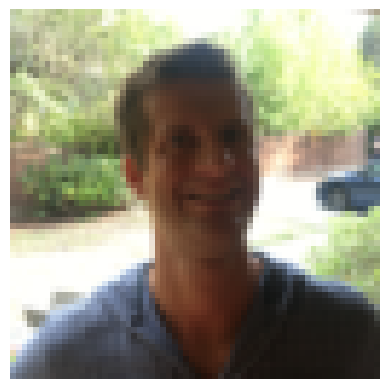

In [3]:
index = 1
plt.imshow(X_train_orig[index]) #display sample training image
plt.axis("off")
plt.show()

<a name='2'></a>
## 2 - The Sequential API



For this notebook, you'll create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As you'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks.  
 

<a name='2-1'></a>
### 2.1 - Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order. 

You can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, much like you would in a regular Python list.

Actually, you can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, you'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor, like you will do in the this task.

<a name='ex-1'></a>
### Function 1 - happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
 
 **Hint:**
 
**tfl** as shorthand for **tensorflow.keras.layers**

In [4]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3            
            tfl.ZeroPadding2D(padding= 3 , input_shape= (64,64,3)),

            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(filters= 32, kernel_size= (7,7),strides= 1),

            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),
            
            ## ReLU
            tfl.ReLU(),

            ## Max Pooling 2D with default parameters
            tfl.MaxPooling2D(),

            ## Flatten layer
            tfl.Flatten(),

            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1,activation= "sigmoid")      
        ])
    
    return model

Now that your model is created, you can compile it for training with an optimizer and loss of your choice. When the string `accuracy` is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make your life easier! If you'd like to read more on how the compiler operates, check the docs [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

In [5]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer. 

In [6]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

<a name='2-2'></a>
### 2.2 - Train and Evaluate the Model

After creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents, you are now ready to build! 


In [7]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10


38/38 [==============================] - 2s 22ms/step - loss: 0.8222 - accuracy: 0.7617
Epoch 2/10
38/38 [==============================] - 1s 21ms/step - loss: 0.2642 - accuracy: 0.9050
Epoch 3/10
38/38 [==============================] - 1s 22ms/step - loss: 0.1290 - accuracy: 0.9483
Epoch 4/10
38/38 [==============================] - 1s 22ms/step - loss: 0.1145 - accuracy: 0.9617
Epoch 5/10
38/38 [==============================] - 1s 22ms/step - loss: 0.0977 - accuracy: 0.9633
Epoch 6/10
38/38 [==============================] - 1s 22ms/step - loss: 0.1370 - accuracy: 0.9350
Epoch 7/10
38/38 [==============================] - 1s 22ms/step - loss: 0.1172 - accuracy: 0.9550
Epoch 8/10
38/38 [==============================] - 1s 23ms/step - loss: 0.2390 - accuracy: 0.9167
Epoch 9/10
38/38 [==============================] - 1s 22ms/step - loss: 0.1281 - accuracy: 0.9533
Epoch 10/10
38/38 [==============================] - 1s 19ms/step - loss: 0.1062 - accuracy: 0.9583


After that completes, just use `.evaluate()` to evaluate against your test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [8]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 13ms/step - loss: 0.1421 - accuracy: 0.9533


[0.14213134348392487, 0.95333331823349]

Easy, right? Let's try it!🤩

1/1 [==============================] - 0s 108ms/step
He is Smiling!🤩, So he can enter the house😂.


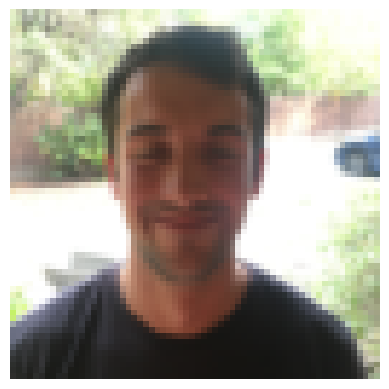

In [9]:
index = 5
prediction = happy_model.predict(np.expand_dims(X_test[index], axis = 0))
if prediction[0,0] >= 0.5:
    print("He is Smiling!🤩, So he can enter the house😂.")
else:
    print("He isn't Smiling!!!,  So he can't enter the hous😒.")
plt.imshow(X_test_orig[index]) #display sample training image
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 29ms/step
He isn't Smiling!!!, So he can't enter the hous😒


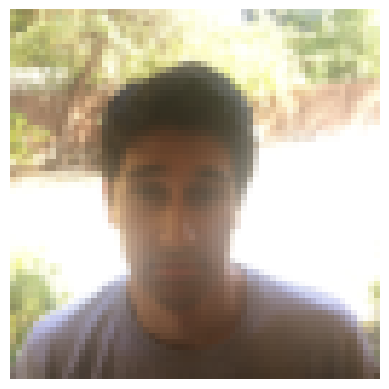

In [10]:
index = 7
prediction = happy_model.predict(np.expand_dims(X_test[index], axis = 0))
if prediction[0,0] >= 0.5:
    print("He is Smiling!🤩, So he can enter the house😂")
else:
    print("He isn't Smiling!!!, So he can't enter the hous😒")
plt.imshow(X_test_orig[index]) #display sample training image
plt.axis("off")
plt.show()

<a name='3'></a>
## 3 - Bibliography

You're always encouraged to read the official documentation. To that end, you can find the docs for the Sequential and Functional APIs here: 

https://www.tensorflow.org/guide/keras/sequential_model

